In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.style.use('fivethirtyeight')

# HW_05 - Customer wait time

In the [waiting for bus](./bus_wait.ipynb) example, we saw a difference between how long we expect the bus interval to be vs how long we _experience_ a bus interval to be. 

Now, consider creating parts on demand for customers. We'll take an example of [folding a paper airplane](https://hackmd.io/@cooperrc/HkISHYNrC/edit). We need some data to start:

1. Follow the paper airplane instructions and make one airplane
2. Edit the instructions to make it easier to follow
3. With your new process: time yourself making one airplane at-a-time and make 5 or 6 airplanes
4. With one hand, try to make a paper airplane and time the process (time process this at least 2 times)

## What is this data meant to show

We, engineers, often prescribe processes and procedures that seem to make sense, but can ignore the people that need to do the work. The process of create-try-edit-repeat should be an integral part of your writing and design process. The one-handed folding procedure could simulate many scenarios:
- someone multitasking
- someone with an injury/unuseable hand
- anything else?

When we consider a process, its important to think about the different people that are required to make the process happen. 

## Next steps

With your times recorded, you can use the average and standard deviations to find the times when parts will be ready as a function of time. Use the difference between the predicted and observed cumulative distribution functions to  predict how long your customers will have to wait on paper airplanes.

In [67]:
N_assemblies = 100

avg_part_time = 0.5

part_ready = np.arange(1, N_assemblies+1)*avg_part_time

Text(0.5, 0, 'time between parts (min)')

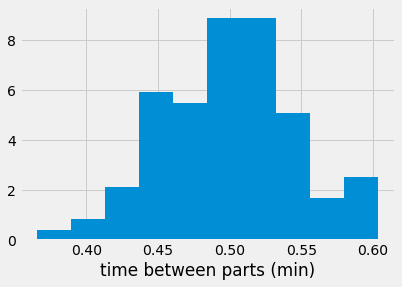

In [70]:
rng = default_rng(42)

std_part_time = 1/60

part_ready += rng.normal(loc = 0, 
                         scale = std_part_time, 
                         size = N_assemblies)

plt.hist(np.diff(part_ready)*1.0, density=True)
plt.xlabel('time between parts (min)')

Text(0.5, 0, 'minutes between parts')

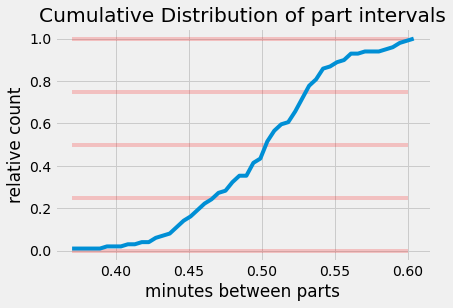

In [83]:
part_time_diff = np.diff(part_ready)*1.0

count, bins_count = np.histogram(part_time_diff, bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf) 
plt.plot(bins_count[1:], cdf)
plt.hlines([0, 0.25, 0.5, 0.75, 1], 
           0.37, 
           0.60, 
          alpha = 0.2, 
          colors = 'r')
plt.title('Cumulative Distribution of part intervals')
plt.ylabel('relative count')
plt.xlabel('minutes between parts')

In [72]:
num_people = 100
people_arrival = rng.random(num_people)*N_assemblies

In [73]:
person_wait = np.zeros(len(people_arrival))
obs_part_interval = np.zeros((len(part_ready), 2))
for i, part_time in enumerate(part_ready[:-1]):
    people_get_part = np.size(people_arrival[
        np.logical_and(people_arrival>=part_time,
                       people_arrival<part_ready[i+1])])
    obs_part_interval[i, 0] = part_ready[i+1] - part_time
    obs_part_interval[i, 1] = people_get_part

In [74]:
obs_part_interval = obs_part_interval[obs_part_interval[:, 0].argsort()]

Text(0.5, 0, 'minutes between parts')

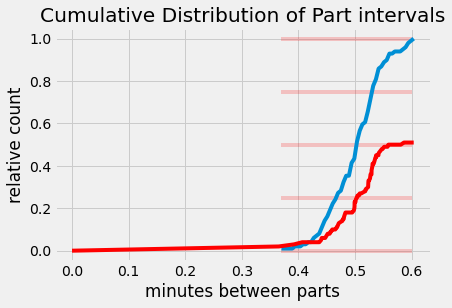

In [91]:
plt.plot(bins_count[1:], 
         cdf,
         label = 'CDF measured'
        )

cdf_obs = np.cumsum(obs_part_interval[:, 1])/num_people

plt.plot(obs_part_interval[:,0]*1.0, 
         cdf_obs, 
         'r-',
        label = 'CDF observed')

plt.hlines([0, 0.25, 0.5, 0.75, 1], 
           0.37, 
           0.6, 
          alpha = 0.2, 
          colors = 'r')
plt.title('Cumulative Distribution of Part intervals')
plt.ylabel('relative count')
plt.xlabel('minutes between parts')

**Introduction**

A procedure is created to fold a paper airplane with one hand. This procedure is completed and the process to complete each part of the procedure is timed. This process is repeated 6 times. The process is also simulated using the coding and graphs above simulating 100 assemblies with a average time of 0.5 minutes to complete each part of the procedure. The average and standard deviations for each assembly is calculated as a function of time. The difference between the predicted and observed cumulative distribution functions is calculated to predict how long your customers will have to wait on paper airplanes.

**Methods**

Observed method:

1. Get a piece of printer paper thatâ€™s a rectangle and lay it on a flat surface. Crease a piece of letter-sized paper in half lengthwise. Crease the fold with your fingernail before unfolding the paper again.

2. Bring the top corners toward the center crease. Grab one of the top corners and fold it toward the crease you just made to form a triangle. Press along the fold with your fingernail so the fold stays in place. Repeat the fold along the other top corner so the top of your paper forms a point.

3. Grab the new top corner on one side of your paper and fold toward the crease to form a long triangle. Run your fingernail across the fold to secure it in place. Fold the other top corner in the same way so your piece of paper looks like a large triangle.

4. Fold the paper along the centerline. Use the first crease you made as a guide for making your next fold. Fold the airplane in half along the crease so the triangles you made are on the inside. Slide your fingernail across the crease so the fold stays in place.

5. Crease the angled side toward the center fold to create the wings. Bring the angled side of the paper to the fold you just made down the middle. Crease the paper with your knuckle or fingernail. Flip the paper airplane over to create the wing on the other side. Ensure the wings are symmetrical to one another so your plane stays level when thrown. Once both sides are creased, unfold them slightly so the plane is flat on top.

7. Repeat this process 6 times.

Predicted method:

1. Run the simulaation and plot the graphs using the code provided above.

**Results**

The observed method produced an average part completion time of 0.50 minutes. This means that the average completion time of the paper airplane was 2.5 minutes. The standard deviation using the observed method was 0.4 minutes to 0.7 minutes. The predicted method produced an average part completion time of 0.51 minutes. This means that the average completion time of the paper airplane was 2.55 minutes. The standard deviation using the predicted method was 0.37 minutes to 0.60 minutes. Additionally, in the predicted method 30% of the parts were completed within 0.46 minutes to 0.56 minutes. Using the difference between the predicted and observed cumulative distribution functions, the customers will have to wait an average of 2.525 minutes for their completed paper airplane.

**Conclusion**

The obsered method produced a lower average part completion time than the predicted method. The observed method produced a higher standard deviation than the predicted method. The observed method produced a more efficient design process however, the predicted method produced better precision. The difference between the predicted and observed cumulative distribution functions was calculated to predict how long your customers will have to wait on paper airplanes. This helps better predict the completion time of a paper airplane using one hand.